# Importing the Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Loading the iris DataSet

In [6]:
from sklearn.datasets import load_iris

In [7]:
data=load_iris()
x=data.data
y=data.target

# Spliting the data into train and test components

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [9]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [35]:
class Model(nn.Module):
    def __init__(self,i=4,h1=10,h2=10,o=3):
        super().__init__()
        self.fc1=nn.Linear(i,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,o)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [36]:
model=Model()

# Initial Weights of the layers

In [39]:
#Initial weights of the 1st layer
model.fc1.weight

Parameter containing:
tensor([[ 0.4751,  0.1819,  0.0554, -0.0781],
        [ 0.0823, -0.4397, -0.4305,  0.2148],
        [ 0.2989, -0.1884, -0.3289, -0.0927],
        [-0.0647, -0.4233,  0.3277,  0.2786],
        [-0.3267,  0.3730,  0.4878,  0.3764],
        [-0.3626, -0.0656,  0.3333, -0.1146],
        [-0.0127, -0.4557,  0.0906,  0.1905],
        [-0.1638,  0.4546,  0.1952,  0.0957],
        [-0.2680,  0.4296, -0.0393,  0.3408],
        [ 0.0102,  0.3678,  0.2938,  0.2891]], requires_grad=True)

In [40]:
#Initial weights of the 2nd layer
model.fc2.weight

Parameter containing:
tensor([[-0.0572, -0.2374, -0.0758,  0.0020, -0.2781,  0.1502,  0.1479, -0.0301,
         -0.2992,  0.2161],
        [ 0.2767, -0.0649, -0.0415, -0.2653,  0.0520,  0.1669, -0.1187,  0.2758,
          0.2875,  0.2953],
        [ 0.1265, -0.1527, -0.2489,  0.0094, -0.1796,  0.0061,  0.1947, -0.1599,
         -0.2452, -0.1818],
        [ 0.0486, -0.1389, -0.0432,  0.1475,  0.0206, -0.2076,  0.2786, -0.0271,
         -0.2301,  0.0106],
        [-0.2602, -0.1314,  0.3131,  0.0884,  0.1956,  0.0774,  0.1995, -0.0376,
          0.2349, -0.2787],
        [ 0.3104, -0.2891, -0.1069, -0.0263,  0.0207, -0.2640,  0.2926,  0.1175,
          0.1205,  0.1804],
        [ 0.1334, -0.0813, -0.1105, -0.3063,  0.0391,  0.1846, -0.1531,  0.0520,
          0.0255,  0.0391],
        [-0.2105, -0.1706,  0.1128,  0.1510, -0.0927, -0.0614, -0.1026,  0.0582,
         -0.1341,  0.0730],
        [-0.0564, -0.1321,  0.1664, -0.2808, -0.1334,  0.1240, -0.0247, -0.2652,
          0.2779, -0.2432

In [41]:
#Initial weights of the 3rd layer
model.fc3.weight

Parameter containing:
tensor([[-0.2326,  0.0322, -0.2748, -0.2364,  0.0412,  0.2771,  0.2369,  0.2585,
         -0.3074, -0.0241],
        [-0.0538,  0.0791, -0.1729,  0.1442,  0.2842,  0.2335, -0.0678,  0.2838,
         -0.1193, -0.2738],
        [-0.1969, -0.1833, -0.2312, -0.2437, -0.0297,  0.2339, -0.0737,  0.1737,
         -0.2018, -0.2315]], requires_grad=True)

In [42]:
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.05)

In [43]:
epochs=100
losses=[]
for i in range(50):
    y_pred=model.forward(x_train)
    los=criteria(y_pred,y_train)
    losses.append(los)
    optimizer.zero_grad()
    los.backward()
    optimizer.step()
    

# Plot showing Loss vs Epochs during Training Process

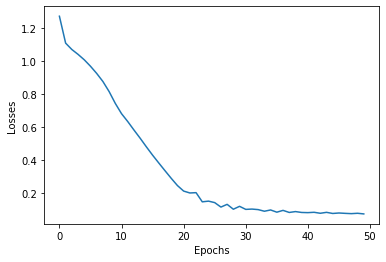

In [44]:
plt.plot(range(50),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.show()

In [45]:
correct=0
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred=model.forward(data)
        if np.argmax(y_pred)==y_test[i]:
            correct=correct+1
print(f'{correct} out of {len(x_test)} accuracy {100*correct/len(x_test)}')
    
    

45 out of 45 accuracy 100.0


# Weights of the layers adter training the model

In [46]:
#Weights of the 1st layer after Training
model.fc1.weight

Parameter containing:
tensor([[ 8.1811e-01,  6.0661e-01,  3.5875e-02, -3.8320e-01],
        [ 8.2288e-02, -4.3974e-01, -4.3045e-01,  2.1483e-01],
        [ 6.9140e-04, -4.8660e-01, -6.2719e-01, -3.9095e-01],
        [ 1.3661e-01, -5.4795e-01,  1.2395e+00,  1.3659e+00],
        [-4.8568e-01, -2.2715e-01,  1.0224e+00,  1.1189e+00],
        [-3.6256e-01, -6.5598e-02,  3.3328e-01, -1.1457e-01],
        [-1.2652e-02, -4.5568e-01,  9.0584e-02,  1.9049e-01],
        [-5.3036e-01,  4.0121e-02, -1.3637e-01, -2.4025e-01],
        [-5.6624e-01,  1.3130e-01, -3.3756e-01,  4.2584e-02],
        [-2.1507e-01, -2.2327e-01,  5.4895e-01,  7.5123e-01]],
       requires_grad=True)

In [47]:
#Weights of the 2nd layer after Training
model.fc2.weight

Parameter containing:
tensor([[-0.3735, -0.2374, -0.3740,  0.4095, -0.5845,  0.1502,  0.1479, -0.3284,
         -0.5974, -0.0920],
        [-0.1964, -0.0649,  0.2567, -0.6478, -0.3078,  0.1669, -0.1187, -0.0917,
         -0.0107, -0.1172],
        [ 1.0293, -0.1527, -0.2489,  0.1531, -1.0262,  0.0061,  0.1947, -0.4369,
         -0.2452, -0.8822],
        [-0.2479, -0.1389, -0.3414,  1.3714,  1.3197, -0.2076,  0.2786,  0.0156,
         -0.5284,  0.8746],
        [-0.6085, -0.1314,  0.3131, -0.2730, -0.1670,  0.0774,  0.1995, -0.0376,
          0.2349, -0.6178],
        [-0.6417, -0.2891,  0.1914,  0.5669,  0.8045, -0.2640,  0.2926, -0.1732,
         -0.1778,  0.6930],
        [-0.1648, -0.0813,  0.1878, -0.6046, -0.2592,  0.1846, -0.1531, -0.2462,
         -0.2727, -0.2592],
        [-0.4862, -0.1706,  0.1128, -0.1247, -0.3684, -0.0614, -0.1026, -0.2175,
         -0.1341, -0.2027],
        [-0.0564, -0.1321,  0.1664, -0.2808, -0.1334,  0.1240, -0.0247, -0.2652,
          0.2779, -0.2432

In [49]:
#Weights of the 3rd layer after Training
model.fc3.weight

Parameter containing:
tensor([[ 5.3243e-02, -1.8836e-01,  1.0068e+00, -1.5113e+00, -3.1972e-01,
         -6.7111e-02, -6.1354e-02, -1.7142e-02, -3.0745e-01, -3.8692e-01],
        [-2.5509e-01,  6.9816e-02,  2.1967e-01,  1.6603e-01, -8.2209e-02,
         -2.3896e-01,  2.3045e-01,  8.1019e-03, -1.1928e-01, -1.0865e-03],
        [-6.1498e-01,  1.1367e-01, -1.7021e+00,  7.2510e-01,  3.3565e-01,
          9.9066e-01,  2.2453e-01,  4.4939e-01, -2.0177e-01,  1.5269e-01]],
       requires_grad=True)

In [62]:
train_pred=np.array(np.argmax(model.forward(x_train).detach(),axis=1).tolist())

In [68]:
test_pred=np.array(np.argmax(model.forward(x_test).detach(),axis=1).tolist())

In [73]:
y_train_py=np.array(y_train.tolist())

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
train_accuracy=accuracy_score(y_train_py,train_pred)
train_accuracy

0.9619047619047619

In [79]:
y_test_py=np.array(y_test.tolist())

In [100]:
test_accuracy=accuracy_score(y_test_py,test_pred)
test_accuracy

1.0

In [83]:
print(classification_report(y_train_py,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.95      0.95      0.95        39
           2       0.94      0.94      0.94        32

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [84]:
print(classification_report(y_test_py,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [86]:
f1_train=1
f2_train=1

In [87]:
import pandas as pd

In [91]:
result=pd.DataFrame({'Parameter':['Train_accuracy','Test_Accuracy','Train_F1_Score','Test_F1_Score']})

In [96]:
l=[round(train_accuracy,4),test_accuracy,1,1]

In [97]:
l

[0.9619, 1.0, 1, 1]

In [98]:
result['Values']=np.array(l)

# Final Scores

In [99]:
result

,Parameter,Values
0,Train_accuracy,0.9619
1,Test_Accuracy,1.0000
2,Train_F1_Score,1.0000
3,Test_F1_Score,1.0000
